In [57]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [58]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


loaded the mushrooms dataset 

In [59]:
df.shape

(8124, 23)

found the dataset of 23 columns and 8124 rows


In [60]:
df.isnull().sum() # checking the null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null value in any of the columns

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

About this file
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d



# Feature Analysis

<AxesSubplot:xlabel='class', ylabel='count'>

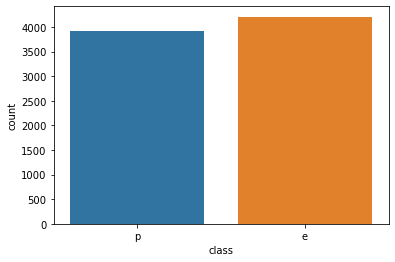

In [62]:
sns.countplot(df['class'])

Found that the target columns as unique two categories and there is no class imbalance. Also the edible class is more than the poisonous


In [63]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

found 4208 are edible and 3916 are poisonous

<Figure size 1008x432 with 0 Axes>

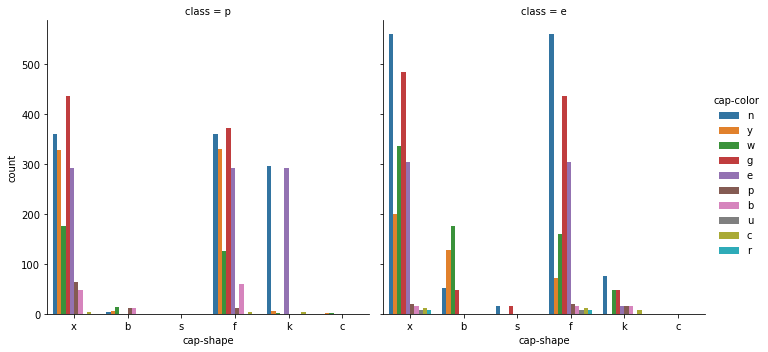

In [64]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="cap-shape",hue="cap-color", col="class",
             data=df,kind='count')

(i) There are two category p and e. In 'p' the second barplot the green color bar 
is lower compared to 'e' category. so the green color bar, represent the white color
and b - bell shaped mushrooms are more edible.
(ii)e n that is red and brown color knobbed shaped mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

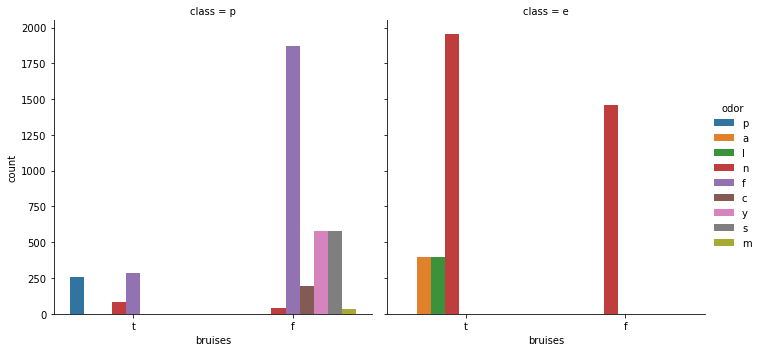

In [65]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="bruises",hue="odor", col="class",
             data=df,kind='count')

n-none odor and f-no bruises are more edible
f-foul odor and f-no bruises are poisonous

<Figure size 1008x432 with 0 Axes>

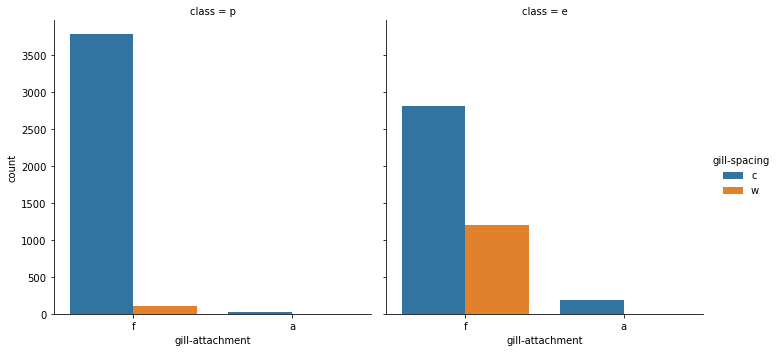

In [66]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="gill-attachment",hue="gill-spacing", col="class",
             data=df,kind='count')

gill-spacing with w-crowded and gill-attachment with f-free  is edible

<Figure size 1008x432 with 0 Axes>

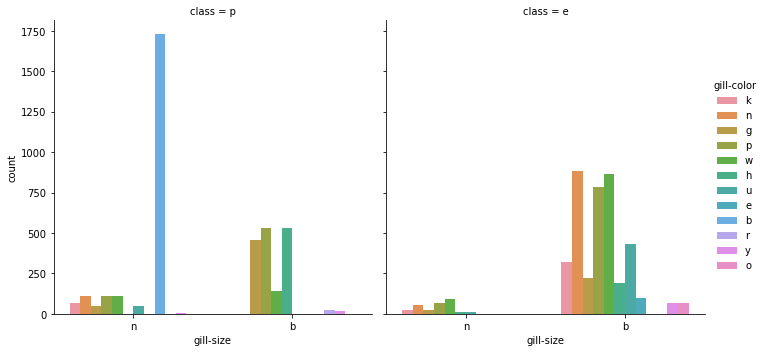

In [67]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="gill-size",hue="gill-color", col="class",
             data=df,kind='count')

gill-color - b - buff and gill-size n - narrow is totaly poisonous

<Figure size 1008x432 with 0 Axes>

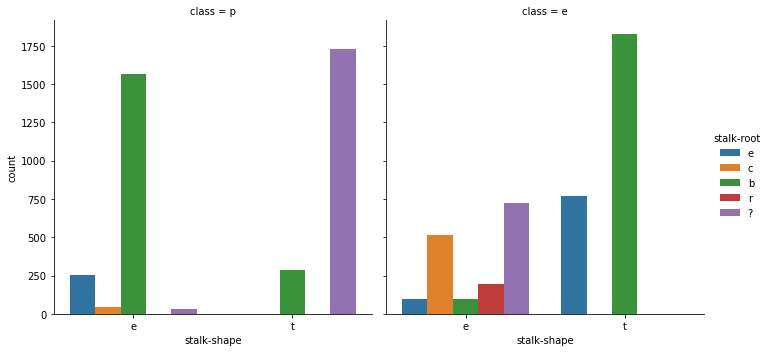

In [68]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="stalk-shape",hue="stalk-root", col="class",
             data=df,kind='count')

stalk-root - e and stalk-shape -e is poisonous
stalk-root - ? and stalk-shape -t is poisonous
stalk-root - b and stalk-shape -t is edible
stalk-root - e and stalk-shape -t is edible


<Figure size 1008x432 with 0 Axes>

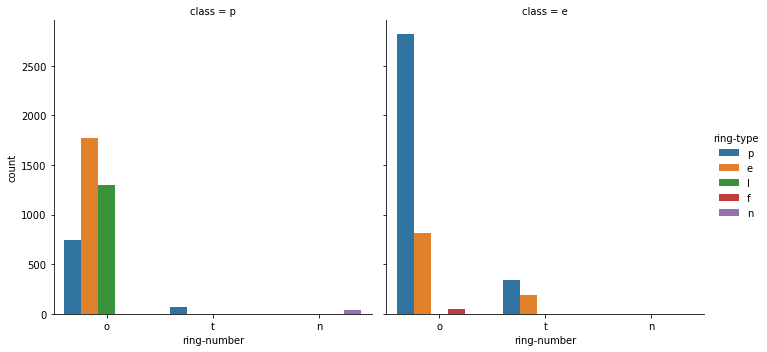

In [69]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="ring-number",hue="ring-type", col="class",
             data=df,kind='count')

ring-type- l and ring numbmer -o is poisonous

<Figure size 1008x432 with 0 Axes>

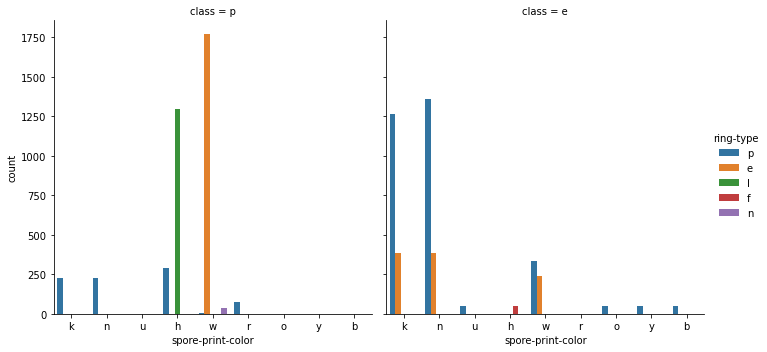

In [70]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="spore-print-color",hue="ring-type", col="class",
             data=df,kind='count')

spore-print-color- w and ring-type e is poisonous

<Figure size 1008x432 with 0 Axes>

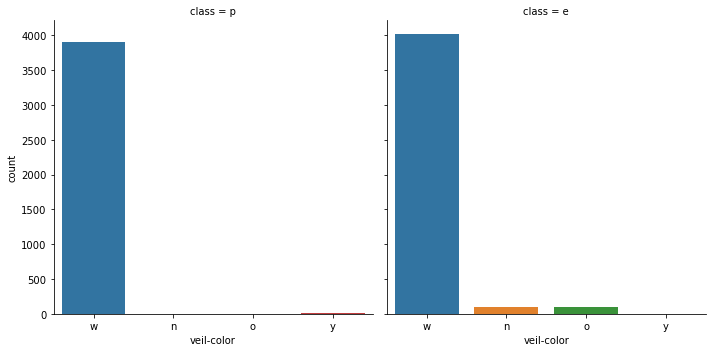

In [72]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="veil-color", col="class",
             data=df,kind='count')

<Figure size 1008x432 with 0 Axes>

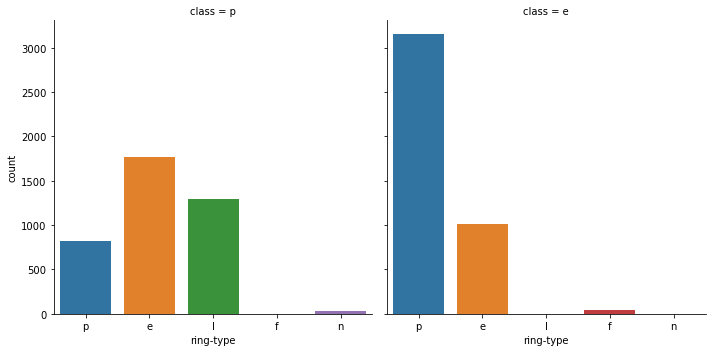

In [73]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="ring-type", col="class",
             data=df,kind='count')

ring type p is more edible

<Figure size 1008x432 with 0 Axes>

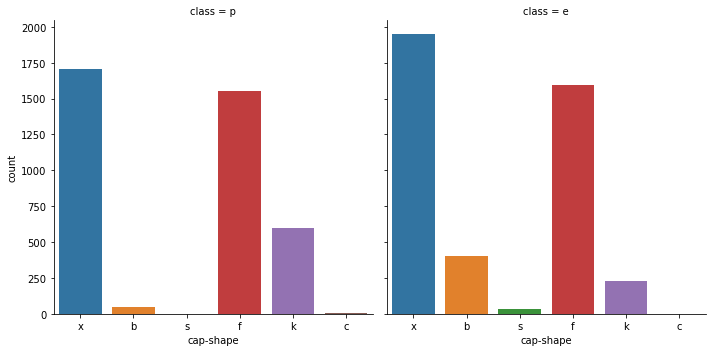

In [74]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="cap-shape", col="class",
             data=df,kind='count')

<Figure size 1008x432 with 0 Axes>

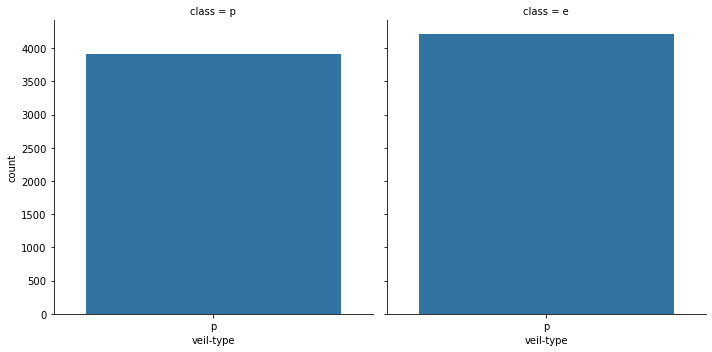

In [75]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="veil-type", col="class",
             data=df,kind='count')

In [76]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

The veil-type is same value for both the class , so we can drop this column

<Figure size 1008x432 with 0 Axes>

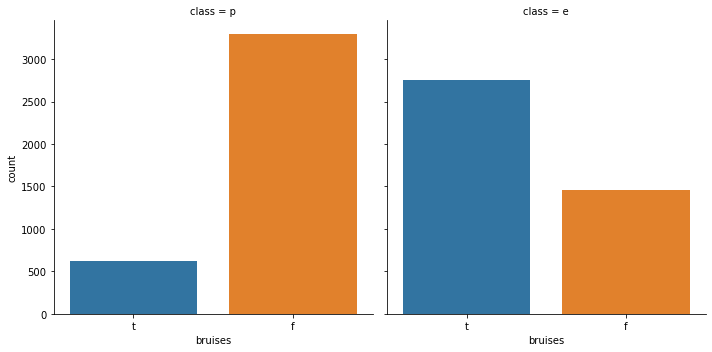

In [77]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="bruises", col="class",
             data=df,kind='count')

t - bruises are more edible

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Data Preprocessing

In [79]:
# converting the categorical dataset into numerical 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [80]:
df=df.drop('veil-type',axis=1)

dropped the veil-type column as it is not necessary

In [87]:
x=df.drop(['class'],axis=1)
y=df['class']


In [89]:
#Choosing the best random state for our ML Model
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu," on Random State ",maxRS)

Best Accuracy is  0.9585726004922067  on Random State  21


We can get the best accuracy in random state 21

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9585726004922067
[[1217   51]
 [  50 1120]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1268
           1       0.96      0.96      0.96      1170

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



Using Logistic Regression we get the accuracyscore 98%, with confusion table details


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



With Random Forest we got 100% accuracy

In [95]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


98.97456931911402
[[1264    4]
 [  21 1149]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1268
           1       1.00      0.98      0.99      1170

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



With Support Vector Classifier we got 98 % accuracy

In [100]:
from sklearn.model_selection import cross_val_score

cvr1=cross_val_score(lr,x,y,cv=5)
print("Cross Validation score of LogisticRegression Model: ",cvr1.mean())

cvr2=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of RandomForest Clasifier Model: ",cvr2.mean())


cvr3=cross_val_score(svc,x,y,cv=5)
print("Cross Validation score of DecisionTreeClassifier Model: ",cvr3.mean())

Cross Validation score of LogisticRegression Model:  0.8400878363016295
Cross Validation score of RandomForest Clasifier Model:  0.8982952633573322
Cross Validation score of DecisionTreeClassifier Model:  0.8420306934444864


As the diffrence between the accuracy score and cross validation score for Random Forest Classifier is leser
so Random Forest Classifier is the best model for this mushroom dataset

# Dumping the model

In [101]:
import joblib
joblib.dump(rf,open('Mushroom_clssification.pkl','wb'))